In [58]:
#Imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier
from sklearn import  metrics


In [59]:
#get Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Frequency')

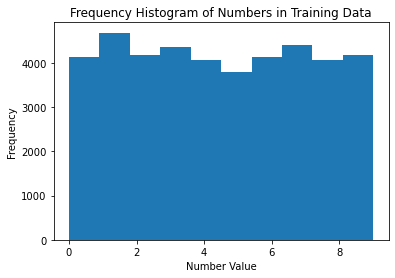

In [61]:
#This simple histogram shows the count of digits in the training data for each number
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")


In [62]:
#First We need to normalize the data
#Normalization with standardScaler or /255
label_train=train['label']
train=train.drop('label', axis=1)

#normalize data
train = train / 255
test = test / 255
train['label'] = label_train

Text(0, 0.5, '% of variance explained')

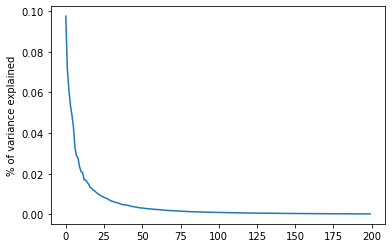

In [63]:
#Apply PCA
pca = pca = decomposition.PCA(n_components=200)
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')


In [66]:
#plotting the data show that at 50 components the variance will be great 
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']
PCtest = pd.DataFrame(pca.transform(test))


In [67]:
#Apply Nueral Network
y = PCtrain['label'][0:20000]
X=PCtrain.drop('label', axis=1)[0:20000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X, y)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3500,), random_state=1,
              solver='lbfgs')

In [69]:
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected = PCtrain['label'][20001:42000]
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3500,), random_state=1,
              solver='lbfgs'):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2200
           1       0.99      0.99      0.99      2418
           2       0.97      0.97      0.97      2167
           3       0.97      0.95      0.96      2270
           4       0.97      0.98      0.97      2101
           5       0.96      0.97      0.97      2001
           6       0.98      0.98      0.98      2155
           7       0.97      0.98      0.97      2331
           8       0.96      0.96      0.96      2148
           9       0.96      0.95      0.96      2208

    accuracy                           0.97     21999
   macro avg       0.97      0.97      0.97     21999
weighted avg       0.97      0.97      0.97     21999


Confusion matrix:
[[2170    0    2    0    3    6   10    1    2    6]
 [   0 2389    6    4    1    

In [70]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output.csv', index=False)